In [4]:
# importing libraries 
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense,BatchNormalization
import numpy as np
from tensorflow.keras.callbacks import TensorBoard
import time
import matplotlib.pyplot as plt
import datetime
import cv2
import os
import tensorflow as tf
import tensorflow.keras
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
print('tf version', tf.__version__)
print('keras version', tf.keras.__version__)
print('gpu is ','available' if tf.config.list_physical_devices('GPU') else 'not available')

tf version 2.4.1
keras version 2.4.0
gpu is  available


**Training data**

In [50]:
subdir = ['angry','disgust','fear','happy','neutral','sad','surprise']
path = './Data/train/'
target_name = {'angry':0,'disgust':1,'fear':2,'happy':3,'neutral':4,'sad':5,'surprise':6}
X_train, y_train = [], []
for emotion in subdir:
    for img_name in os.listdir(path+emotion):
        if '.jpg' in img_name:
            img = cv2.imread(path+emotion+'/'+img_name)
            scalled_raw_img = cv2.resize(img, (32, 32))/255.0

            X_train.append(scalled_raw_img)
            y_train.append(target_name[emotion])

In [51]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape

((4270, 32, 32, 3), (4270,))

In [52]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=7)

y_train.shape

(4270, 7)

**Test data**

In [53]:
subdir = ['angry','disgust','fear','happy','neutral','sad','surprise']
path = './Data/test/'
target_name = {'angry':0,'disgust':1,'fear':2,'happy':3,'neutral':4,'sad':5,'surprise':6}
X_test, y_test = [], []
for emotion in subdir:
    for img_name in os.listdir(path+emotion):
        if '.jpg' in img_name:
            img = cv2.imread(path+emotion+'/'+img_name)
            scalled_raw_img = cv2.resize(img, (32, 32))/255.0

            X_test.append(scalled_raw_img)
            y_test.append(target_name[emotion])

In [54]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((770, 32, 32, 3), (770,))

In [55]:
y_test = tf.keras.utils.to_categorical(y_test, num_classes=7)
y_test.shape

(770, 7)

In [56]:
input_shape = (32, 32, 3) 

model3 = Sequential()

model3.add(Conv2D(32, (3,3), input_shape=input_shape, activation='relu',data_format='channels_last'))
model3.add(MaxPooling2D((2,2), strides=(1,1), padding='same'),)

model3.add(Conv2D(64, (3,3), activation='relu'),)
model3.add(MaxPooling2D((2,2), strides=(1,1), padding='same'),)

model3.add(Conv2D(128, (3,3), activation='relu'),)
model3.add(MaxPooling2D((2,2), strides=(1,1), padding='same'),)
# model3.add(Dropout(0.15))

model3.add(Flatten())

model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))

model3.add(Dropout(0.2))
model3.add(Dense(7, activation='softmax'))

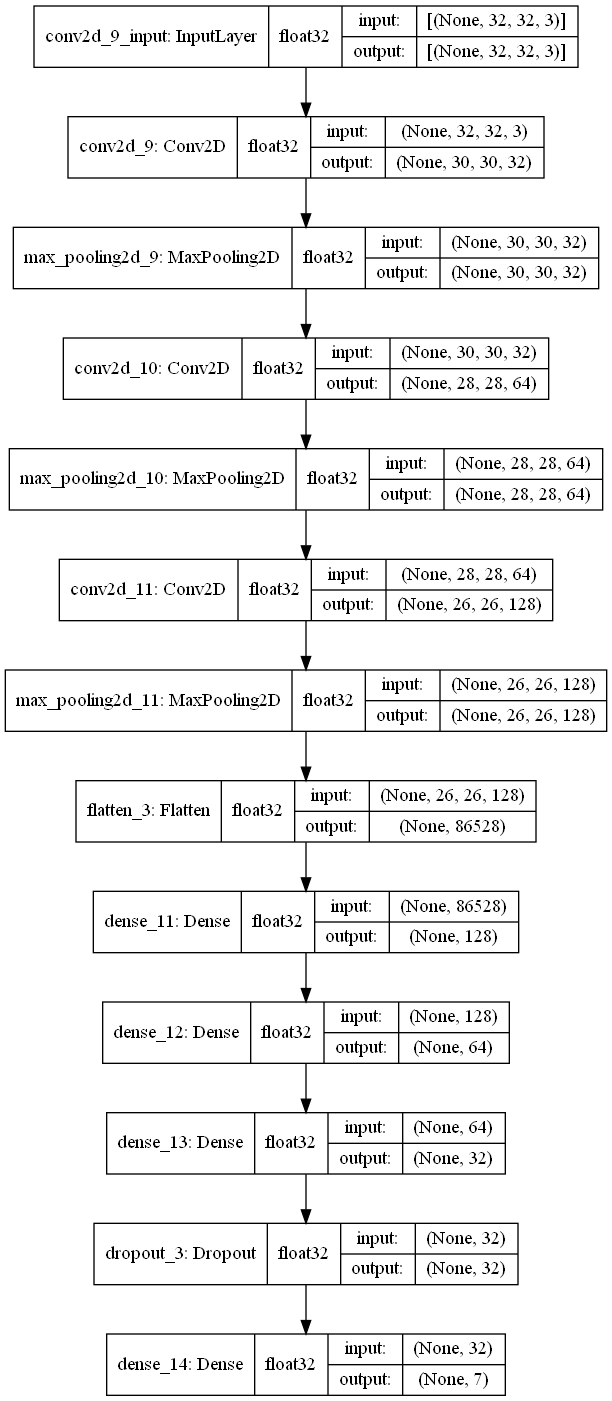

In [57]:
import keras
keras.utils.plot_model(
    model3,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [58]:
model3.compile(loss ='categorical_crossentropy',
                     optimizer ='rmsprop', 
                   metrics =['accuracy']) 

In [59]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 26, 26, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 86528)            

In [60]:
H = model3.fit(
    x=X_train,
    y=y_train,
    batch_size=128,
    epochs=50,
    validation_data=(X_test, y_test)) #Model Training

Epoch 1/50
34/34 [==============================] - 2s 49ms/step - loss: 2.6348 - accuracy: 0.1497 - val_loss: 1.9419 - val_accuracy: 0.1766
Epoch 2/50
34/34 [==============================] - 1s 39ms/step - loss: 1.9437 - accuracy: 0.1792 - val_loss: 1.9108 - val_accuracy: 0.2026
Epoch 3/50
34/34 [==============================] - 1s 37ms/step - loss: 1.8735 - accuracy: 0.2492 - val_loss: 1.8325 - val_accuracy: 0.2481
Epoch 4/50
34/34 [==============================] - 1s 37ms/step - loss: 1.8045 - accuracy: 0.2896 - val_loss: 1.6914 - val_accuracy: 0.3260
Epoch 5/50
34/34 [==============================] - 1s 35ms/step - loss: 1.7314 - accuracy: 0.3270 - val_loss: 1.5775 - val_accuracy: 0.4338
Epoch 6/50
34/34 [==============================] - 1s 35ms/step - loss: 1.5968 - accuracy: 0.3828 - val_loss: 1.4818 - val_accuracy: 0.4442
Epoch 7/50
34/34 [==============================] - 1s 35ms/step - loss: 1.4718 - accuracy: 0.4526 - val_loss: 1.3489 - val_accuracy: 0.5195
Epoch 8/50
34

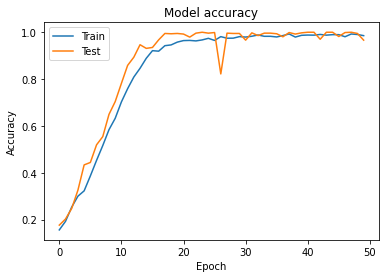

In [61]:
# Plot training & validation accuracy values
fig, ax = plt.subplots(1,1)
plt.plot(H.history["accuracy"])
plt.plot(H.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


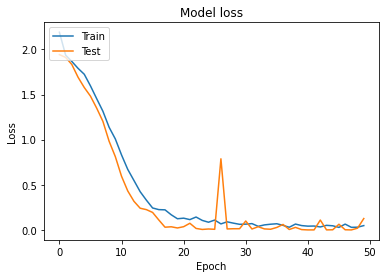

In [62]:
# Plot training & validation loss values
fig, ax = plt.subplots(1,1)
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Classification Report
              precision    recall  f1-score   support

       angry       0.94      0.97      0.96       110
     disgust       1.00      0.98      0.99       110
        fear       0.98      0.94      0.96       110
       happy       0.99      0.92      0.95       110
     neutral       0.98      0.98      0.98       110
         sad       0.96      0.97      0.97       110
    surprise       0.92      1.00      0.96       110

    accuracy                           0.97       770
   macro avg       0.97      0.97      0.97       770
weighted avg       0.97      0.97      0.97       770



Text(69.0, 0.5, 'Predicted')

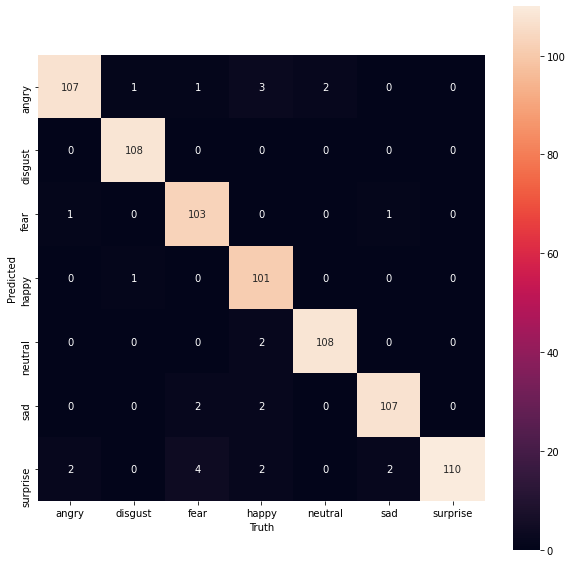

In [64]:
y_pred = np.argmax(model3.predict(X_test,batch_size=1), axis=1) 

print('Classification Report')
y_classes = [np.argmax(y, axis=None, out=None) for y in y_test]
report = classification_report(y_classes, y_pred, target_names=target_name.keys())
print(report)

plt.figure(figsize=(10,10))
cm = confusion_matrix(y_classes, y_pred)
_=sns.heatmap(cm.T, annot=True, fmt='d', cbar=True, square=True, xticklabels=target_name.keys(),
             yticklabels=target_name.keys())
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [65]:
model3.save('./logs/em_rec.h5')
model3.save('./logs')

INFO:tensorflow:Assets written to: ./logs\assets


## Single image test

In [69]:
img = cv2.imread('test1.jpg')
img = np.array(cv2.resize(img, (32, 32))/255.0)

In [73]:
img = img.reshape(1,32,32,3)
img.shape

(1, 32, 32, 3)

In [67]:
model = tf.keras.models.load_model('./logs/em_rec.h5',compile=True)

In [74]:
y_pred = np.argmax(model.predict(img,batch_size=1), axis=1) 

In [77]:
target_name = {0:'angry',1:'disgust',2:'fear',3:'happy',4:'neutral',5:'sad',6:'surprise'}

In [78]:
target_name[y_pred[0]]

'surprise'